In [37]:
import tensorflow as tf
from keras.utils import image_dataset_from_directory
batch_size = 32
img_size=(178,218)
img_shape=(178,218,3)

dataset = image_dataset_from_directory(
  'dataset_1024', 
  labels='inferred', 
  batch_size=batch_size, 
  image_size=img_size, 
  shuffle=True
)
class_names = dataset.class_names
# Preprocess the images by scaling them to the range [-1,1]
preprocessed_ds = dataset.map(lambda x, y: (x / 127.5 - 1, y))

Found 4781 files belonging to 2 classes.


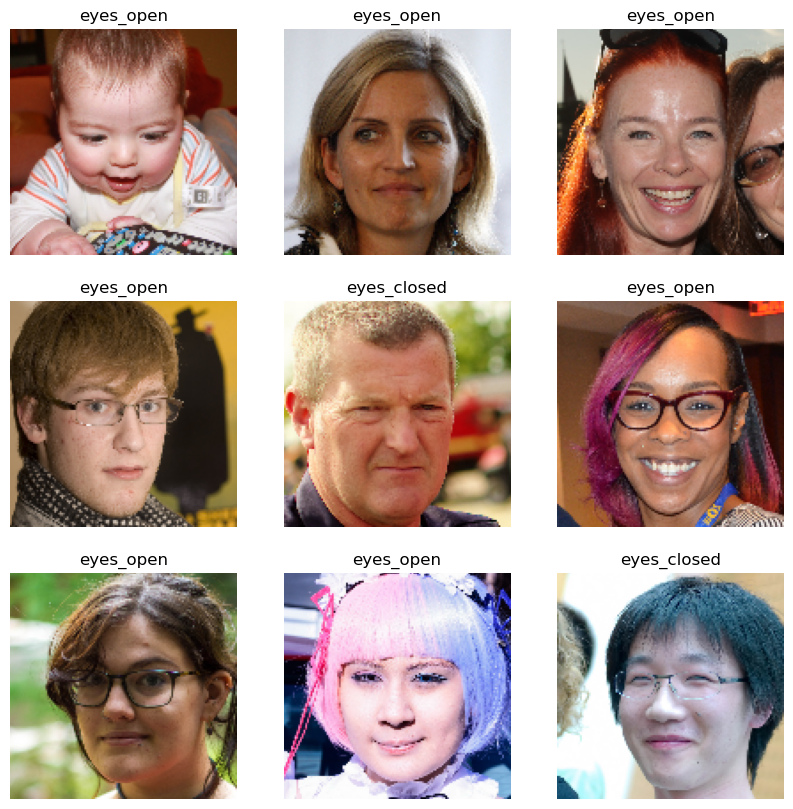

In [38]:
import matplotlib.pyplot as plt
# Take a batch from the original dataset (not preprocessed)
batch = next(iter(dataset.take(1)))
# Plot the images and the labels
plt.figure(figsize=(10, 10))
for i in range(9):
    # Get the image and the label at the i-th position
    image = batch[0][i]
    label = batch[1][i]
    # Create a subplot for the image
    ax = plt.subplot(3, 3, i + 1)
    # Display the image
    plt.imshow(image.numpy().astype("uint8"))
    # Turn off the axes
    plt.axis("off")
    # Display the label as the title
    plt.title(class_names[label])
# Show the plot
plt.show()

In [39]:
import keras
from keras import layers
# Define the discriminator model
def create_discriminator(img_shape):
    # Create a sequential model
    model = keras.Sequential()
    # Add the first convolutional layer
    model.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding="same", input_shape=img_shape))
    model.add(layers.LeakyReLU(alpha=0.2))
    # Add the second convolutional layer
    model.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    # Add the third convolutional layer
    model.add(layers.Conv2D(256, (4, 4), strides=(2, 2), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    # Add the fourth convolutional layer
    model.add(layers.Conv2D(512, (4, 4), strides=(2, 2), padding="same"))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    # Add the fifth convolutional layer
    model.add(layers.Conv2D(1, (4, 4), strides=(1, 1), padding="valid"))
    model.add(layers.Activation("sigmoid"))
    # Return the model
    return model

# Define the generator model
def create_generator(latent_dim, img_shape):
    # Create a latent vector input
    latent_input = keras.Input(shape=(latent_dim,))
    # Create an image input
    image_input = keras.Input(shape=img_shape)
    # Generate a feature map from the latent vector
    x = layers.Dense(128 * 128 * 3)(latent_input)
    x = layers.Reshape((128, 128, 3))(x)
    # Concatenate the feature map and the image input
    x = layers.Concatenate()([x, image_input])
    # Add the first deconvolutional layer
    x = layers.Conv2DTranspose(512, (4, 4), strides=(1, 1), padding="valid")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Add the second deconvolutional layer
    x = layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Add the third deconvolutional layer
    x = layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Add the fourth deconvolutional layer
    x = layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    # Add the fifth deconvolutional layer
    x = layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding="same")(x)
    x = layers.Activation("tanh")(x)
    # Create the model with two inputs and one output
    model = keras.Model([latent_input, image_input], x)
    # Return the model
    return model

discriminator = create_discriminator(img_shape=img_shape)
genereator = create_generator(latent_dim=100, img_shape=img_shape)